<a href="https://colab.research.google.com/github/sasya05/adm/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

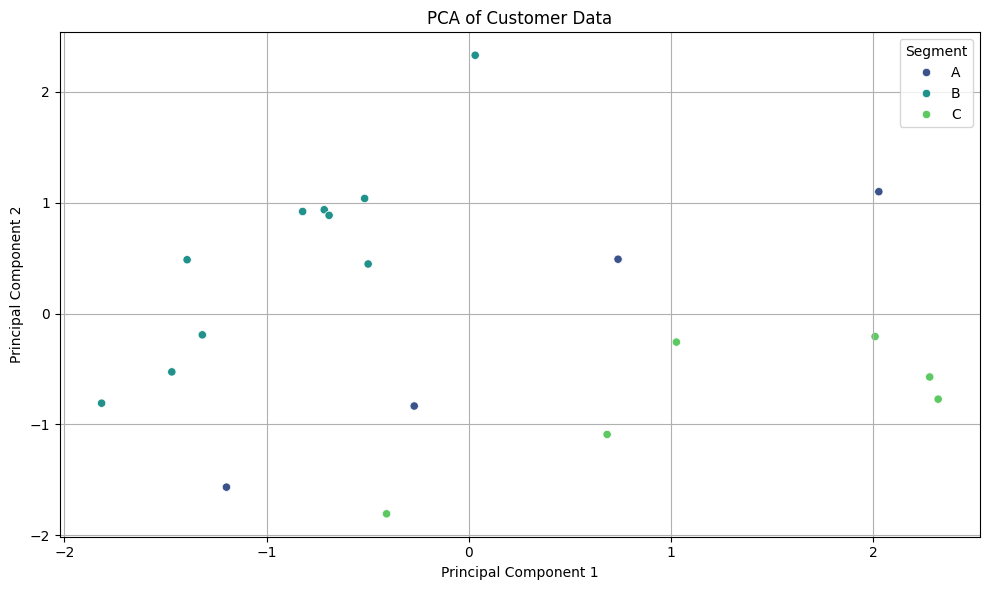

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/customer_data.csv')
features = ['Age', 'Annual Income', 'Spending Score']
x = df[features].dropna()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
if 'Customer Segmentation' in df.columns:
    pca_df['Segment'] = df['Customer Segmentation']
plt.figure(figsize=(10, 6))
if 'Segment' in pca_df.columns:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Segment', palette='viridis')
else:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
!pip install reportlab
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image as RLImage
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4


df = pd.read_csv('customer_data.csv')


features = ['Age', 'Annual Income', 'Spending Score']
x = df[features].dropna()
x_scaled = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
if 'Customer Segmentation' in df.columns:
    pca_df['Segment'] = df.loc[x.index, 'Customer Segmentation']
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Segment', palette='viridis')
plt.title('PCA of Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plot_path = "pca_plot.png"
plt.savefig(plot_path)
plt.close()

doc = SimpleDocTemplate("PCA_Report.pdf", pagesize=A4)
styles = getSampleStyleSheet()
story = []

story.append(Paragraph("PCA Report - Customer Segmentation", styles['Title']))
story.append(Spacer(1, 12))

variance_text = f"Explained Variance by PC1 and PC2: {pca.explained_variance_ratio_[0]:.2f}, {pca.explained_variance_ratio_[1]:.2f}"
story.append(Paragraph(variance_text, styles['Normal']))
story.append(Spacer(1, 12))

story.append(RLImage(plot_path, width=400, height=300))
story.append(Spacer(1, 12))

doc.build(story)
print("PDF report saved as 'PCA_Report.pdf'")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.7 MB/s eta 0:00:00
PDF report saved as 'PCA_Report.pdf'
